# GraphRAG 快速部署与调用

## 一、GraphRAG 安装与项目创建

In [5]:
# 查看当前的python解释器
! which python

# 查看当前工作目录
! pwd

/root/miniconda3/envs/graphrag/bin/python


/root/code/graphrag


### Step 1. 使用 pip 安装 graphrag

In [6]:
! pip install graphrag==0.5.0

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


### Step 2. 创建检索项目文件夹

In [9]:
mkdir -p ./openl/input

文件夹名称 `input` 不能改变。该文件夹用于存放所有的问答文档。

### Step 3. 上传数据集

将用于构建 GraphRAG 系统的 `.txt` 文档放入 `input` 文件夹中。

### Step 4. 初始化项目文件

运行以下 cell，或在终端执行`graphrag init --root ./openl`

In [10]:
! graphrag init --root ./openl

Initializing project at /root/code/graphrag/openl
⠋ GraphRAG Indexer 

初始化后，openl 目录结构如下：

In [11]:
! tree ./openl -a -L 1

./openl
├── .env
├── input
├── prompts
└── settings.yaml

3 directories, 2 files


### Step 5. 修改项目配置

1. 打开`.env`文件，填写 `OpenAI API-KEY`和反向代理地址

In [12]:
%%bash

cat <<EOF > ./openl/.env
GRAPHRAG_API_KEY=YOUR_OPENAI_API_KEY
GRAPHRAG_API_BASE=YOUR_OPENAI_API_BASE_URL
EOF

2. 打开`settings.yaml`文件，修改模型名称和反向代理地址。在终端执行以下命令：

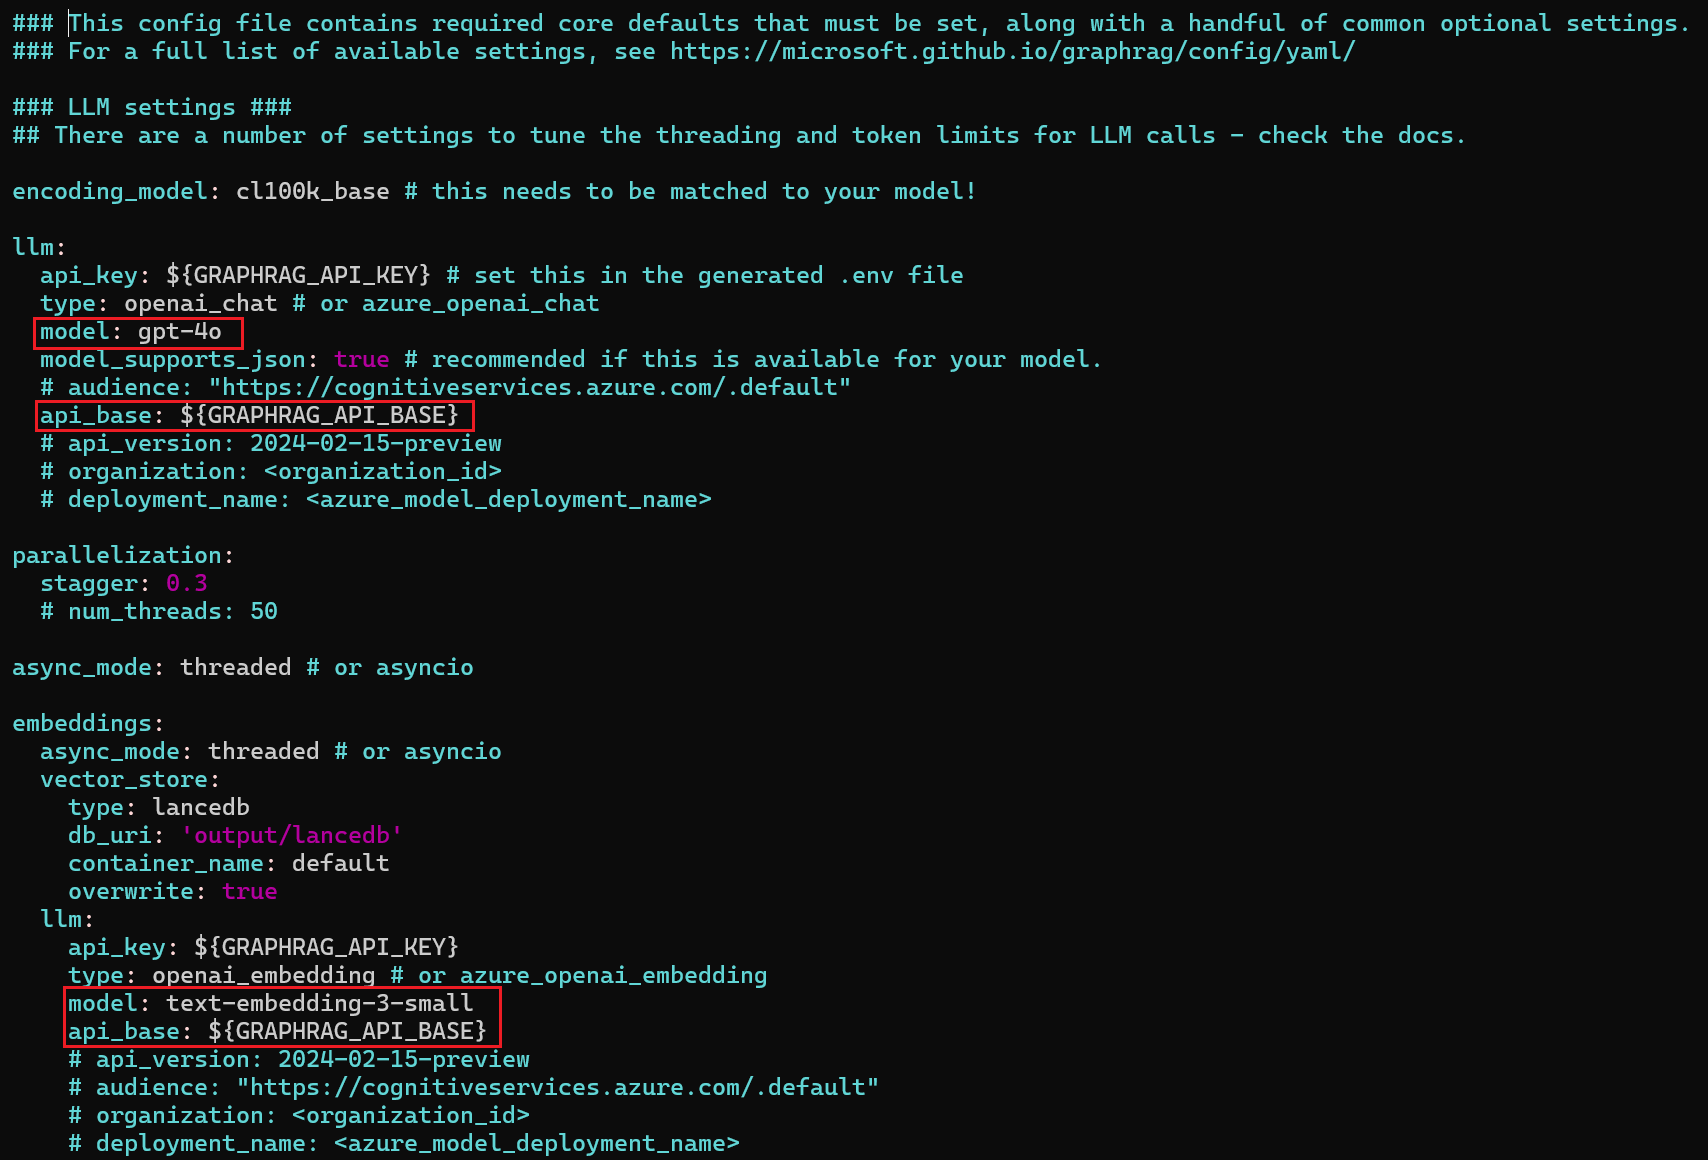

In [7]:
# 查看 setting.yaml 修改结果
from IPython.display import display, Image

display(Image(filename='./images/修改settings.png'))

### Step 6.验证 API-KEY 和反向代理地址是否可以正常运行【可选】

In [13]:
! pip install openai
! pip install python-dotenv

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


In [14]:
import os
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
# 实例化客户端
client = OpenAI(
    api_key=os.getenv("GRAPHRAG_API_KEY"), 
    base_url=os.getenv("GRAPHRAG_API_BASE")
    )

# 调用 GPT-4o-mini 模型
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": "你好，好久不见!"}
    ]
)
# 输出生成的响应内容
print(response.choices[0].message.content)

你好！很高兴见到你！最近怎么样？


## 二、GraphRAG 索引 Indexing 过程执行

一切准备就绪后，即可开始执行GraphRAG索引过程。

### Step 7. 借助 GraphRAG 脚本自动执行 indexing

In [15]:
! graphrag index --root ./openl --reporter rich


Logging enabled at /root/code/graphrag/openl/logs/indexing-engine.log
⠋ GraphRAG Indexer 
⠋ GraphRAG Indexer e.text) - 1 files loaded (0 filtered) ━ 100% … 0…
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
⠴ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
🚀 create_base_text_units
⠴ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
Empty DataFrame
Columns: []
Index: []
⠴ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
⠴ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
⠴ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
├── create_base_text_units
🚀 create_final_documents
⠦ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 1 files loaded (0 filtered) ━ 100% … 0…
├── create_base_text_units
           

该命令会自动查找当前主文件夹`openl`下`input`里面的所有文档，根据`.env`和`settings.yml`中设置的参数，完成所有文档向知识图谱转换的一系列过程。

该命令也可以在终端内运行：`graphrag index --root ./openl --reporter rich`

运行结束后，知识图谱相关数据集都保存在`output`文件夹中：

In [16]:
%%bash

tree ./openl -a -L 2

./openl
├── .env
├── cache
│   ├── community_reporting
│   ├── entity_extraction
│   ├── summarize_descriptions
│   └── text_embedding
├── input
│   └��─ ID3、C4.5决策树的建模流程.txt
├── logs
│   ├── indexing-engine.log
│   └── logs.json
├── output
│   ├── create_final_communities.parquet
│   ├── create_final_community_reports.parquet
│   ├── create_final_documents.parquet
│   ├── create_final_entities.parquet
│   ├── create_final_nodes.parquet
│   ├── create_final_relationships.parquet
│   ├── create_final_text_units.parquet
│   ├── lancedb
│   └── stats.json
├── prompts
│   ├── claim_extraction.txt
│   ├── community_report.txt
│ �� ├── drift_search_system_prompt.txt
│   ├── entity_extraction.txt
│   ├── global_search_knowledge_system_prompt.txt
│   ├── global_search_map_system_prompt.txt
│   ├── global_search_reduce_system_prompt.txt
│   ├── local_search_system_prompt.txt
│   ├── question_gen_system_prompt.txt
│   └── summarize_descriptions.txt
└── settings.yaml

11 directories, 23 files


**GraphRAG 在索引阶段构建的知识图谱**是以 **Parquet** 格式保存的。索引阶段的输出文件中，Parquet 文件存储了知识图谱的各个核心组成部分，例如实体、关系、社区信息以及文本单元等。这些文件共同组成了一个完整的知识图谱。

索引阶段的主要输出内容如下：
1. 实体表（Nodes Table）
  - 文件名：create_final_nodes.parquet
  - 内容：知识图谱中的实体节点（例如：人、地点、组织）。
  - 包含信息：
    - 实体的名称（如 "John Doe"）。
    - 实体的类别（如 "PERSON", "ORGANIZATION", "LOCATION"）。
    - 与社区相关的信息（如实体所属的社区）。
      - 实体的度数（degree），表示该实体在图谱中的连接数。
2. 关系表（Relationships Table）
  - 文件名：create_final_relationships.parquet
  - 内容：知识图谱中实体之间的关系（即图谱的边）。
  - 包含信息：
    - 两个实体之间的关系描述（例如 "works for", "lives in"）。
    - 关系的强度（数值化，用于衡量关系的显著性或重要性）。
3. 嵌入向量表（Entity Embedding Table）
  - 文件名：create_final_entities.parquet
  - 内容：实体的语义嵌入，用于表示实体的语义信息。
  - 用途：支持语义搜索（通过嵌入计算实体之间的相似性）。
4. 社区报告表（Community Reports Table）
  - 文件名：create_final_community_reports.parquet
  - 内容：社区的摘要信息。
  - 用途：支持全局搜索（通过社区信息回答关于数据集整体的问题）。
5. 文本单元表（Text Units Table）
  - 文件名：create_final_text_units.parquet
  - 内容：被切分的原始文本单元（TextUnits）。
  - 用途：将知识图谱和原始文本结合，为 LLM 提供上下文支持。
6. 社区表（Community Table）
  - 文件名：create_final_Communities.parquet
  - 内容：每个社区基本情况。
7. 文件表（Documents Table）
  - 文件名：create_final_documents.parquet
  - 内容：用于记录所有参与知识图谱构建的文件情况。

> 为什么用 Parquet 格式保存知识图谱？
1. 高效存储：
- 知识图谱中的数据通常是结构化的，包含大量的实体、关系、嵌入等。
- Parquet 的列式存储能够显著减少磁盘占用，同时提高读取效率。
2. 快速读取：
- 查询阶段需要快速加载实体、关系、嵌入等数据到内存中。
- Parquet 支持按需加载所需的列，避免了不必要的数据读取。
3. 兼容性好：
- Parquet 是一个开放的标准，广泛支持各种数据处理工具（如 Pandas、Spark、Hadoop）。
- GraphRAG 可以在 Python 中使用 Pandas 或其他工具轻松读取这些文件。

### Step 8. 查看知识图谱相关表格

所有表格在创建过程中都会经过多次更新，表名中的`final`表示最终版本。

In [17]:
import pandas as pd

- 文件表（Documents Table）

    用于记录所有参与知识图谱构建的文件情况。

In [18]:
documents_df = pd.read_parquet("./openl/output/create_final_documents.parquet")
documents_df

,id,human_readable_id,title,text,text_unit_ids
0,c546fa97b72c8b72b7efb0c1ac45cb1d,1,ID3、C4.5决策树的建模流程.txt,Lesson 8.3 ID3、C4.5决策树的建模流程\nID3和C4.5作为的经典决策树算...,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."


- 文本单元表（TEXT UNIT Table）

In [19]:
text_unit_df = pd.read_parquet("./openl/output/create_final_text_units.parquet")
text_unit_df

,id,human_readable_id,text,n_tokens,document_ids,entity_ids,relationship_ids
0,0653a697b64dd8c029503ffc22af9ec3,1,Lesson 8.3 ID3、C4.5决策树的建模流程\nID3和C4.5作为的经典决策树算...,1200,[c546fa97b72c8b72b7efb0c1ac45cb1d],"[aea46335c35b46e990de41e268696d35, 99103fd583f...","[b6a9d2fd9e6240a4838ddb7e437debf2, 4ad6344305b..."
1,b1fce21a45f01c5ef14bafc9fe3bab1d,2,8961919\n然后即可算出按照如此规则进行数据集划分，最终能够减少的不纯度数值：\n# ...,1200,[c546fa97b72c8b72b7efb0c1ac45cb1d],"[aea46335c35b46e990de41e268696d35, 99103fd583f...","[b6a9d2fd9e6240a4838ddb7e437debf2, 4ad6344305b..."
2,08530861b09098077a0ebcd53ab3ae62,3,4.5决策树的基本建模流程\n作为ID3的改进版算法，C4.5在ID3的基础上进行了三个方面...,1200,[c546fa97b72c8b72b7efb0c1ac45cb1d],None,None
3,e97cc7c63047f6471b4beac2f375eae0,4,集划分。\n\nC4.5的连续变量处理方法\nC4.5允许带入连续变量进行建模，并且围绕连续...,558,[c546fa97b72c8b72b7efb0c1ac45cb1d],None,None


- 实体嵌入表（ENTITIES Table）

In [20]:
entity_embedding_df = pd.read_parquet("./openl/output/create_final_entities.parquet")
# entity_embedding_df.head()
entity_embedding_df

,id,human_readable_id,title,type,description,text_unit_ids
0,aea46335c35b46e990de41e268696d35,0,ID3,ORGANIZATION,ID3 is a classic decision tree algorithm used ...,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
1,99103fd583f7459789ef78e2eef9ea17,1,C4.5,ORGANIZATION,C4.5 is an enhanced version of the ID3 decisio...,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
2,2beacc0f20434db6952846f435231b8a,2,CART,ORGANIZATION,CART (Classification and Regression Trees) is ...,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
3,3814467b981d447e92322df42e4f5f16,3,AGE,EVENT,AGE is used as a feature for data binning in d...,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
4,4639fc7be5c14ae1922efb55de8166da,4,INCOME,EVENT,INCOME is a feature utilized in decision tree ...,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
5,abc5918f0600423db2e0f96eaa255205,5,NUMPY,ORGANIZATION,Numpy is a Python library used for numerical c...,[0653a697b64dd8c029503ffc22af9ec3]
6,6026de021fda40ba9f99d0d482c8b7bc,6,ML_BASIC_FUNCTION,ORGANIZATION,ML_basic_function is a module or library used ...,[0653a697b64dd8c029503ffc22af9ec3]
7,61b44943f91942b3bd865fae8aedb614,7,SKLEARN,,,[0653a697b64dd8c029503ffc22af9ec3]
8,cdeb5062417e4e2ab5a8b48c1497e258,8,STUDENT,EVENT,Student is a column used in the decision tree ...,[b1fce21a45f01c5ef14bafc9fe3bab1d]
9,054fd53978de4c9a930fdac000a4fbaa,9,CREDIT_RATING,EVENT,Credit rating is a column used in the decision...,[b1fce21a45f01c5ef14bafc9fe3bab1d]


- 实体表（Nodes Table）

In [21]:
entity_df = pd.read_parquet("./openl/output/create_final_nodes.parquet")
# entity_df.head()
entity_df

,id,human_readable_id,title,community,level,degree,x,y
0,aea46335c35b46e990de41e268696d35,0,ID3,0,0,9,0,0
1,99103fd583f7459789ef78e2eef9ea17,1,C4.5,1,0,2,0,0
2,2beacc0f20434db6952846f435231b8a,2,CART,0,0,1,0,0
3,3814467b981d447e92322df42e4f5f16,3,AGE,0,0,1,0,0
4,4639fc7be5c14ae1922efb55de8166da,4,INCOME,0,0,1,0,0
5,abc5918f0600423db2e0f96eaa255205,5,NUMPY,0,0,1,0,0
6,6026de021fda40ba9f99d0d482c8b7bc,6,ML_BASIC_FUNCTION,0,0,1,0,0
7,61b44943f91942b3bd865fae8aedb614,7,SKLEARN,1,0,2,0,0
8,cdeb5062417e4e2ab5a8b48c1497e258,8,STUDENT,0,0,1,0,0
9,054fd53978de4c9a930fdac000a4fbaa,9,CREDIT_RATING,0,0,1,0,0


- 关系表（Relationships Table）

In [22]:
relationships_df = pd.read_parquet("./openl/output/create_final_relationships.parquet")
relationships_df

,id,human_readable_id,source,target,description,weight,combined_degree,text_unit_ids
0,b6a9d2fd9e6240a4838ddb7e437debf2,0,ID3,C4.5,C4.5 is an improved version of the ID3 algorit...,9.0,11,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
1,4ad6344305bc41ac884395d8711ed909,1,ID3,CART,ID3 and CART are both decision tree algorithms...,11.0,10,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
2,43175ba3343a4ad283f19cc37298e16a,2,ID3,AGE,"The ID3 algorithm utilizes ""Age"" as a critical...",13.0,10,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
3,ebc1c251662643249ed84c9ead20ca5b,3,ID3,INCOME,"In the context of the ID3 algorithm, income is...",6.0,10,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
4,a28e106cb26e448985ea2238547285ad,4,ID3,SKLEARN,ID3 is a decision tree algorithm that cannot b...,5.0,11,[0653a697b64dd8c029503ffc22af9ec3]
5,6a89c7ac792141f69155c6c0c3ad634e,5,ID3,NUMPY,Numpy is used in the calculation of informatio...,6.0,10,[0653a697b64dd8c029503ffc22af9ec3]
6,88a62d2e73024a5499291ed0b7d6af04,6,ID3,ML_BASIC_FUNCTION,ML_basic_function is used in the context of im...,1.0,10,[0653a697b64dd8c029503ffc22af9ec3]
7,4fb10d81ac6b41e9ada24b5d502de1cb,7,ID3,STUDENT,Student is assessed in the ID3 algorithm to de...,5.0,10,[b1fce21a45f01c5ef14bafc9fe3bab1d]
8,a77be78e00264c35b5497adaa932f750,8,ID3,CREDIT_RATING,Credit rating is used in the ID3 algorithm to ...,1.0,10,[b1fce21a45f01c5ef14bafc9fe3bab1d]
9,529793390a5847349a640d03a714e96e,9,C4.5,SKLEARN,C4.5 is a decision tree algorithm that cannot ...,5.0,4,[0653a697b64dd8c029503ffc22af9ec3]


- 社区表（Community Table）

In [23]:
community_df = pd.read_parquet("./openl/output/create_final_communities.parquet")
community_df

,id,human_readable_id,community,level,title,entity_ids,relationship_ids,text_unit_ids,period,size
0,4f72c899-2fc9-42e6-b46f-49d077a16f10,0,0,0,Community 0,"[aea46335c35b46e990de41e268696d35, 2beacc0f204...","[b6a9d2fd9e6240a4838ddb7e437debf2, 4ad6344305b...","[0653a697b64dd8c029503ffc22af9ec3,b1fce21a45f0...",2025-05-16,8
1,44d1f1f8-5d58-4086-b2fc-7908b94df798,1,1,0,Community 1,"[99103fd583f7459789ef78e2eef9ea17, 61b44943f91...","[529793390a5847349a640d03a714e96e, b6a9d2fd9e6...","[0653a697b64dd8c029503ffc22af9ec3,b1fce21a45f0...",2025-05-16,2


- 社区报告表（Community Report Table）

In [24]:
community_report_df = pd.read_parquet("./openl/output/create_final_community_reports.parquet")
community_report_df

,id,human_readable_id,community,level,title,summary,full_content,rank,rank_explanation,findings,full_content_json,period,size
0,1ac16e92-e8e5-4f9f-a2c1-58527f4d2e3c,0,0,0,ID3 Decision Tree Algorithm Community,The community is centered around the ID3 decis...,# ID3 Decision Tree Algorithm Community\n\nThe...,7.5,The impact severity rating is high due to the ...,[{'explanation': 'The ID3 algorithm is a pivot...,"{\n ""title"": ""ID3 Decision Tree Algorithm C...",2025-05-16,8
1,07634b8d-f043-485e-a844-7011b5b728bf,1,1,0,C4.5 and Sklearn Integration Challenges,The community is centered around the C4.5 deci...,# C4.5 and Sklearn Integration Challenges\n\nT...,3.5,The impact severity rating is low due to the t...,[{'explanation': 'C4.5 is an advanced version ...,"{\n ""title"": ""C4.5 and Sklearn Integration ...",2025-05-16,2


社区报告表中，每一行代表一个社区的摘要信息，这些信息是围绕该社区实体的分析，包含了与该社区相关的标题、摘要、实体、关系等详细内容。这些信息是 GraphRAG 在索引阶段基于知识图谱生成的高层次语义总结，用于帮助回答关于数据集整体的问题（例如全局搜索）。

**表格字段的含义**
1. **`id`**
   * 每个社区的唯一标识符（UUID）。
   * 这是系统内部生成的，通常用于追踪社区记录。
2. **`human_readable_id`**
   * 更容易理解的人类可读ID（数字化或短标识符）。
   * 通常用于直观地区分社区。
3. **`community`**
   * 社区的编号，代表社区的分类或标识。
4. **`level`**
   * 社区层级（`COMMUNITY_LEVEL`）。
   * 表示社区的聚类粒度。较低的值表示更抽象的层级，较高的值表示更具体的细分社区。
5. **`title`**
   * 社区的标题。
   * 对该社区的简要描述，用于表示该社区的主题核心。例如：
     * **`ID3 Decision Tree Algorithm Community`**
     * **`C4.5 and Sklearn Integration`**
6. **`summary`**
   * 社区的摘要。
   * 对该社区内容的进一步扩展描述，解释其主题或涵盖的主要内容。
7. **`full_content`**
   * 社区报告的完整内容。
   * 包括更详细的信息，可能包含标题、摘要、重要发现等。
8. **`rank`**
   * 社区的排名或评分。
   * 可能用来表示社区的重要性、影响力或相关性。
9. **`rank_explanation`**
   * 对排名的解释。
   * 例如，“影响严重性从中等到高”。
10. **`findings`**
    * 社区的主要发现（JSON 格式）。
    * 包含详细的解释或分析。例如：
      * **ID3 算法是该社区的核心主题。**
      * **C4.5 是 ID3 的改进版本，结合了 Sklearn 的功能。**
11. **`full_content_json`**
    * 社区完整内容的 JSON 表示。
    * 如果需要以结构化方式处理社区内容，这个字段是关键。
12. **`period`**
    * 报告的时间戳或周期。
    * 在你的示例中，是 `2024-11-26`，表示报告生成的日期。
13. **`size`**
    * 社区的大小。
    * 表示该社区包含的实体或内容的数量。例如：
      * **社区 0 包含 8 个内容。**
      * **社区 1 包含 2 个内容。**


**用途**

社区报告在查询阶段可以用于：
1. **全局搜索（Global Search）**：
   * 回答关于数据集整体的问题，例如“这些文档的主要主题是什么？”
2. **快速理解社区**：
   * 帮助用户快速了解数据集中不同部分的主题和相关信息。
3. **可视化与调试**：
   * 将这些社区报告与知识图谱结合起来，可以直观地呈现社区的结构和语义关系。

## 四、GraphRAG 问答流程

### Step 1. 导入核心关系组

#### 导入 python 依赖

In [25]:
import os

import pandas as pd
import tiktoken

from graphrag.query.context_builder.entity_extraction import EntityVectorStoreKey
from graphrag.query.indexer_adapters import (
    read_indexer_covariates,
    read_indexer_entities,
    read_indexer_relationships,
    read_indexer_reports,
    read_indexer_text_units,
)
from graphrag.query.input.loaders.dfs import (
    store_entity_semantic_embeddings,
)
from graphrag.query.llm.oai.chat_openai import ChatOpenAI
from graphrag.query.llm.oai.embedding import OpenAIEmbedding
from graphrag.query.llm.oai.typing import OpenaiApiType
from graphrag.query.question_gen.local_gen import LocalQuestionGen
from graphrag.query.structured_search.local_search.mixed_context import (
    LocalSearchMixedContext,
)
from graphrag.query.structured_search.local_search.search import LocalSearch
from graphrag.vector_stores.lancedb import LanceDBVectorStore

**与索引器相关的模块**

* **`read_indexer_*`**
  从不同的索引文件中读取数据（例如实体、关系、摘要等）。这些模块负责加载索引器生成的数据到 Python 中，供后续搜索或分析使用：

  * `read_indexer_covariates`: 读取与数据协变量（附加属性）相关的信息。

  * `read_indexer_entities`: 读取从数据中提取的实体。

  * `read_indexer_relationships`: 读取实体间的关系。

  * `read_indexer_reports`: 读取生成的社区报告摘要。

  * `read_indexer_text_units`: 读取切分后的文本单元（TextUnits）。

* **`store_entity_semantic_embeddings`**
  将实体的语义嵌入存储到向量数据库中。GraphRAG 用嵌入向量来表示实体间的语义关系。

**与 LLM（大型语言模型）相关的模块**

* **`ChatOpenAI`**
  一个封装了 OpenAI 聊天模型（如 GPT 系列）的接口，允许你通过编程与 OpenAI 模型交互（如提出问题、获取回答）。

* **`OpenAIEmbedding`**
  用于生成文本的嵌入向量的模块，通过调用 OpenAI 的嵌入 API，将文本转换为语义向量表示。

* **`OpenaiApiType`**
  定义 OpenAI API 的具体类型，可能包括“聊天模型”、“嵌入模型”等。

**与本地搜索相关的模块**

* **`LocalSearch`**
  GraphRAG 的本地搜索引擎，专注于通过上下文和邻近信息回答关于特定实体的问题。

* **`LocalSearchMixedContext`**
  允许混合使用不同上下文数据（例如实体及其邻居的关系）来丰富本地搜索的结果。

* **`LocalQuestionGen`**
  用于在本地搜索中生成问题的模块，帮助生成更相关的问题。

**与向量存储相关的模块**

* **`LanceDBVectorStore`**
  GraphRAG 使用的向量存储解决方案之一，支持存储和检索语义嵌入向量。可以快速高效地查找与查询向量最相似的嵌入。

#### 定义输入目录与文件路径

In [26]:
INPUT_DIR = "./openl/output"            # 知识图谱存放路径
LANCEDB_URI = f"{INPUT_DIR}/lancedb"    # 向量数据库的路径

* **`INPUT_DIR`**：索引器输出文件的存放目录。在这里，索引器输出的路径为 `./openl/output`。

* **`LANCEDB_URI`**：存放向量存储（LanceDB 数据库）的目录路径。在 GraphRAG 中，实体嵌入向量通常被存储在 LanceDB 中，以便后续搜索时高效检索。

#### 定义数据表文件名

In [27]:
COMMUNITY_REPORT_TABLE = "create_final_community_reports"
ENTITY_TABLE = "create_final_nodes"
ENTITY_EMBEDDING_TABLE = "create_final_entities"
RELATIONSHIP_TABLE = "create_final_relationships"
TEXT_UNIT_TABLE = "create_final_text_units"
COMMUNITY_LEVEL = 2

* **`COMMUNITY_REPORT_TABLE`**：存储社区报告的文件名。社区报告是基于知识图谱生成的每个社区的摘要。

* **`ENTITY_TABLE`**：存储实体的文件名（知识图谱中的节点）。每个节点代表一个实体，例如人、地点或组织。

* **`ENTITY_EMBEDDING_TABLE`**：存储实体的嵌入向量。嵌入表示实体的语义信息，用于计算实体之间的相似性。

* **`RELATIONSHIP_TABLE`**：存储实体间关系的文件名（知识图谱中的边）。关系表示两个实体之间的交互或连接。

* **`TEXT_UNIT_TABLE`**：存储文本单元的文件名（原始文本数据被切分为的小块）。

* **`COMMUNITY_LEVEL`**：指定加载的社区层级。社区层级表示知识图谱的聚类粒度（层次化结构中的第2层）。

#### 读取表并保存到数据库缓存

In [29]:
# 实体表
entity_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_TABLE}.parquet")
entity_embedding_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_EMBEDDING_TABLE}.parquet")

entities = read_indexer_entities(entity_df, entity_embedding_df, COMMUNITY_LEVEL)

description_embedding_store = LanceDBVectorStore(
    collection_name="default-entity-description",
)
description_embedding_store.connect(db_uri=LANCEDB_URI)
entity_description_embeddings = store_entity_semantic_embeddings(
    entities=entities, vectorstore=description_embedding_store
)

print(f"Entity count: {len(entity_df)}")
entity_df.head()

Entity count: 10


,id,human_readable_id,title,community,level,degree,x,y
0,aea46335c35b46e990de41e268696d35,0,ID3,0,0,9,0,0
1,99103fd583f7459789ef78e2eef9ea17,1,C4.5,1,0,2,0,0
2,2beacc0f20434db6952846f435231b8a,2,CART,0,0,1,0,0
3,3814467b981d447e92322df42e4f5f16,3,AGE,0,0,1,0,0
4,4639fc7be5c14ae1922efb55de8166da,4,INCOME,0,0,1,0,0


In [30]:
# 实体关系表
relationship_df = pd.read_parquet(f"{INPUT_DIR}/{RELATIONSHIP_TABLE}.parquet")
relationships = read_indexer_relationships(relationship_df)

print(f"Relationship count: {len(relationship_df)}")
relationship_df.head()

Relationship count: 10


,id,human_readable_id,source,target,description,weight,combined_degree,text_unit_ids
0,b6a9d2fd9e6240a4838ddb7e437debf2,0,ID3,C4.5,C4.5 is an improved version of the ID3 algorit...,9.0,11,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
1,4ad6344305bc41ac884395d8711ed909,1,ID3,CART,ID3 and CART are both decision tree algorithms...,11.0,10,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
2,43175ba3343a4ad283f19cc37298e16a,2,ID3,AGE,"The ID3 algorithm utilizes ""Age"" as a critical...",13.0,10,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
3,ebc1c251662643249ed84c9ead20ca5b,3,ID3,INCOME,"In the context of the ID3 algorithm, income is...",6.0,10,"[0653a697b64dd8c029503ffc22af9ec3, b1fce21a45f..."
4,a28e106cb26e448985ea2238547285ad,4,ID3,SKLEARN,ID3 is a decision tree algorithm that cannot b...,5.0,11,[0653a697b64dd8c029503ffc22af9ec3]


In [31]:
# 社区报告表
report_df = pd.read_parquet(f"{INPUT_DIR}/{COMMUNITY_REPORT_TABLE}.parquet")
reports = read_indexer_reports(report_df, entity_df, COMMUNITY_LEVEL)

print(f"Report records: {len(report_df)}")
report_df

Report records: 2


,id,human_readable_id,community,level,title,summary,full_content,rank,rank_explanation,findings,full_content_json,period,size
0,1ac16e92-e8e5-4f9f-a2c1-58527f4d2e3c,0,0,0,ID3 Decision Tree Algorithm Community,The community is centered around the ID3 decis...,# ID3 Decision Tree Algorithm Community\n\nThe...,7.5,The impact severity rating is high due to the ...,[{'explanation': 'The ID3 algorithm is a pivot...,"{\n ""title"": ""ID3 Decision Tree Algorithm C...",2025-05-16,8
1,07634b8d-f043-485e-a844-7011b5b728bf,1,1,0,C4.5 and Sklearn Integration Challenges,The community is centered around the C4.5 deci...,# C4.5 and Sklearn Integration Challenges\n\nT...,3.5,The impact severity rating is low due to the t...,[{'explanation': 'C4.5 is an advanced version ...,"{\n ""title"": ""C4.5 and Sklearn Integration ...",2025-05-16,2


In [32]:
# 文本单元表
text_unit_df = pd.read_parquet(f"{INPUT_DIR}/{TEXT_UNIT_TABLE}.parquet")
text_units = read_indexer_text_units(text_unit_df)

print(f"Text unit records: {len(text_unit_df)}")
text_unit_df.head()

Text unit records: 4


,id,human_readable_id,text,n_tokens,document_ids,entity_ids,relationship_ids
0,0653a697b64dd8c029503ffc22af9ec3,1,Lesson 8.3 ID3、C4.5决策树的建模流程\nID3和C4.5作为的经典决策树算...,1200,[c546fa97b72c8b72b7efb0c1ac45cb1d],"[aea46335c35b46e990de41e268696d35, 99103fd583f...","[b6a9d2fd9e6240a4838ddb7e437debf2, 4ad6344305b..."
1,b1fce21a45f01c5ef14bafc9fe3bab1d,2,8961919\n然后即可算出按照如此规则进行数据集划分，最终能够减少的不纯度数值：\n# ...,1200,[c546fa97b72c8b72b7efb0c1ac45cb1d],"[aea46335c35b46e990de41e268696d35, 99103fd583f...","[b6a9d2fd9e6240a4838ddb7e437debf2, 4ad6344305b..."
2,08530861b09098077a0ebcd53ab3ae62,3,4.5决策树的基本建模流程\n作为ID3的改进版算法，C4.5在ID3的基础上进行了三个方面...,1200,[c546fa97b72c8b72b7efb0c1ac45cb1d],None,None
3,e97cc7c63047f6471b4beac2f375eae0,4,集划分。\n\nC4.5的连续变量处理方法\nC4.5允许带入连续变量进行建模，并且围绕连续...,558,[c546fa97b72c8b72b7efb0c1ac45cb1d],None,None


### Step 2. 设置模型参数

#### GraphRAG v0.5 版本 bug 修复

GraphRAG v0.5 版本在使用 Embedding 模型时，会出现运行报错：`TypeError: Query column vector must be a vector. Got list<item: double>.` 相关问题可查看：[Issue #1335 · microsoft/graphrag](https://github.com/microsoft/graphrag/issues/1335)

此时需要修改 graphrag 源码中的`lancedb.py`文件，设置 Embedding 模型的维度，才可正常运行。

在 Ubuntu 服务器下，脚本文件的路径一般为：`/root/miniconda3/envs/graphrag/lib/python3.11/site-packages/graphrag/vector_stores/lancedb.py`

修改`lancedb.py`文件中的函数`load_documents`，在第 55 行添加`N = 1536`声明 Embedding 模型的维度，并在第 59 行添加参数`N`，修改结果如下：

`N`的值由使用的 Embedding 模型决定。当使用 OpenAI `text-embedding-3-small`时，需手动设置`N=1536`，而若使用`text-embedding-3-large`，则需要设置`N=3072`。

#### 设置模型参数

In [33]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
api_key = os.getenv("GRAPHRAG_API_KEY")
api_base = os.getenv("GRAPHRAG_API_BASE")
llm_model = "gpt-4o"
embedding_model = "text-embedding-3-small"

In [34]:
llm = ChatOpenAI(
    api_key=api_key,
    model=llm_model,
    api_base=api_base,
    api_type=OpenaiApiType.OpenAI,  
    max_retries=20,
)

token_encoder = tiktoken.get_encoding("cl100k_base")

text_embedder = OpenAIEmbedding(
    api_key=api_key,
    api_base=api_base,
    api_type=OpenaiApiType.OpenAI,
    model=embedding_model,
    deployment_name=embedding_model,
    max_retries=20,
)

**初始化 Chat 模型**

* **`ChatOpenAI`**：

  * 用于与 OpenAI 或 Azure OpenAI 的聊天模型（如 GPT 系列）交互。

  * **参数说明**：

    * **`api_key`**：访问 OpenAI 或 Azure OpenAI 的密钥。

    * **`model`**：指定 LLM 模型名称（如 `gpt-4`）。

    * **`api_base`**：API 的基础路径，可以填写反向代理地址

    * **`api_type`**：API 类型，可以是：

      * **`OpenaiApiType.OpenAI`**：OpenAI 直连服务。

      * **`OpenaiApiType.AzureOpenAI`**：Azure OpenAI 服务。

    * **`max_retries`**：最大重试次数，以处理网络或服务中断。

**初始化文本分词器**

* **`tiktoken`**：

  * 用于对输入文本进行分词或令牌化操作。

  * **`cl100k_base`**：一种令牌编码方式，适用于 GPT 系列模型（如 `gpt-3.5-turbo` 和 `gpt-4`）。

  * **用途**：

    * 计算输入文本的令牌数量，确保不超过模型的上下文窗口限制。

**初始化嵌入生成器**

* **`OpenAIEmbedding`**：

  * 用于生成文本的嵌入向量。

  * **参数说明**：

    * **`api_key`**：用于访问 OpenAI 嵌入 API 的密钥。

    * **`api_base`**：API 的基础路径，可以填写反向代理地址

    * **`api_type`**：API 类型，与 LLM 相同。

    * **`model`**：指定嵌入模型名称，例如 `text-embedding-ada-002`。

    * **`deployment_name`**：Azure 模型部署名称（如果使用 Azure）。

    * **`max_retries`**：最大重试次数。

### Step 3. 构建LocalSearch（本地搜索）搜索引擎并进行问答

#### 1. 创建LocalSearch上下文构建器

In [35]:
context_builder = LocalSearchMixedContext(
    community_reports=reports,
    text_units=text_units,
    entities=entities,
    relationships=relationships,
    covariates=None,
    entity_text_embeddings=description_embedding_store,
    embedding_vectorstore_key=EntityVectorStoreKey.ID,  
    text_embedder=text_embedder,
    token_encoder=token_encoder,
)

#### 2. 创建本地搜索引擎参数组

In [36]:
local_context_params = {
    "text_unit_prop": 0.5,
    "community_prop": 0.1,
    "conversation_history_max_turns": 5,
    "conversation_history_user_turns_only": True,
    "top_k_mapped_entities": 10,
    "top_k_relationships": 10,
    "include_entity_rank": True,
    "include_relationship_weight": True,
    "include_community_rank": True,
    "return_candidate_context": True,
    "embedding_vectorstore_key": EntityVectorStoreKey.ID,  
    "max_tokens": 12_000, 
}

llm_params = {
    "max_tokens": 2_000, 
    "temperature": 0.0,
}

#### 3. 创建本地搜索引擎

In [37]:
search_engine = LocalSearch(
    llm=llm,
    context_builder=context_builder,
    token_encoder=token_encoder,
    llm_params=llm_params,
    context_builder_params=local_context_params,
    response_type="multiple paragraphs", 
)

#### 4. 基于本地搜索的问答流程

In [40]:
result = await search_engine.asearch("请帮我介绍下ID3决策树算法")

result

SearchResult(response='ID3（Iterative Dichotomiser 3）决策树算法是一种用于分类的机器学习算法，由Ross Quinlan在1986年提出。它是一种基于信息增益的贪心算法，旨在通过递归地选择最优特征来构建决策树，从而对数据进行分类。以下是对ID3算法的详细介绍。\n\n### 算法原理\n\nID3算法的核心思想是通过选择信息增益最大的特征来分割数据集。信息增益是基于信息论中的熵概念来定义的。熵用于衡量数据集的纯度或不确定性。信息增益则表示在某一特征的基础上，数据集的不确定性减少的程度。具体步骤如下：\n\n1. **计算熵**：首先计算整个数据集的熵。熵越高，数据集的不确定性越大。\n\n2. **选择特征**：对于每一个特征，计算其信息增益。信息增益是通过计算在该特征的基础上，数据集熵的减少量来获得的。\n\n3. **分裂数据集**：选择信息增益最大的特征作为当前节点的分裂特征，并根据该特征的不同取值将数据集分裂成子集。\n\n4. **递归构建**：对每一个子集，重复上述步骤，直到满足停止条件（如所有实例属于同一类，或没有剩余特征可供选择）。\n\n### 优点和缺点\n\n**优点**：\n- 简单易懂：ID3算法的原理简单，易于实现和理解。\n- 快速构建：由于其贪心策略，ID3能够快速构建决策树。\n\n**缺点**：\n- 过拟合：ID3容易对训练数据过拟合，特别是在数据集较小或特征较多的情况下。\n- 偏向多值特征：ID3倾向于选择取值较多的特征，因为这些特征通常会带来较高的信息增益。\n- 不能处理连续数据：ID3只能处理离散数据，对于连续数据需要进行预处理。\n\n### 应用场景\n\nID3算法适用于需要快速构建模型的分类任务，尤其是在数据特征较为简单且离散的情况下。它常用于教育、医疗诊断、市场分析等领域的初步数据分析和模型构建。\n\n总之，ID3决策树算法是机器学习中一种经典的分类算法，尽管存在一些局限性，但其简单性和直观性使其在许多应用中仍然具有重要的价值。', context_data={}, context_text='', completion_time=12.122886657714844, llm_calls=1, prompt_tokens=599, output_token

In [39]:
from IPython.display import display, Markdown

display(Markdown(result.response))

ID3（Iterative Dichotomiser 3）决策树算法是一种用于分类的机器学习算法，由Ross Quinlan在1986年提出。它是一种基于信息增益的贪心算法，旨在通过递归地选择最优特征来构建决策树，从而对数据进行分类。以下是对ID3算法的详细介绍。

### 算法原理

ID3算法的核心思想是通过信息增益来选择每一步的最优特征。信息增益是衡量一个特征在数据集上对分类结果的影响程度的指标。具体来说，信息增益是通过计算在选择某个特征进行划分后，数据集的熵（entropy）减少的程度来确定的。熵是一个度量数据集纯度的指标，熵越低，数据集越纯。

#### 信息增益计算

1. **计算数据集的总熵**：首先计算整个数据集的熵，表示为H(D)，其中D是数据集。
2. **计算特征的条件熵**：对于每个特征A，计算在该特征的条件下数据集的熵，表示为H(D|A)。
3. **计算信息增益**：信息增益是总熵与条件熵的差值，表示为Gain(D, A) = H(D) - H(D|A)。

在每个节点，ID3选择信息增益最大的特征进行划分。

### 算法步骤

1. **初始化**：从根节点开始，计算当前数据集的熵。
2. **选择特征**：计算每个特征的信息增益，选择信息增益最大的特征进行划分。
3. **划分数据集**：根据选择的特征，将数据集划分为子集。
4. **递归构建子树**：对每个子集，重复上述步骤，直到满足停止条件（如所有实例属于同一类，或没有剩余特征可用）。
5. **生成叶节点**：当无法继续划分时，生成叶节点，叶节点的类别为当前子集中实例最多的类别。

### 优缺点

**优点**：
- 简单易懂，易于实现。
- 适用于小型数据集，计算效率较高。

**缺点**：
- 对于连续数据和缺失值处理不够灵活。
- 容易过拟合，尤其是在数据集较小或特征较多的情况下。
- 偏向于选择取值较多的特征。

### 应用场景

ID3算法广泛应用于各种分类问题，如信用风险评估、医疗诊断、市场营销等领域。尽管ID3在某些方面存在局限性，但其简单性和直观性使其成为学习决策树算法的良好起点。

总之，ID3决策树算法是机器学习中一种经典的分类算法，通过信息增益来选择最优特征，构建出能够有效分类的决策树。